**MAJOR PROJECT BY DHARNEESH G**

This is an image classification model to classify images into pictures of cats or pictures of dogs. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required modules

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# setting model parameters

BATCH_SIZE = 32
IMG_SHAPE = 150 # our training data consists of images of width and height 150px

In [ ]:
# function to plot images

def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    
  plt.tight_layout()
  plt.show()

In [ ]:
train_dir='/content/drive/MyDrive/ML_project_course/dataset'

In [ ]:
# creating training data generator

# here we have less training samples --> overfitting occurs
# so we use data augmentation

image_gen_train = ImageDataGenerator(
    rescale = 1./255, validation_split=0.2, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
    shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir,
                                                     shuffle = True,subset='training', target_size = (IMG_SHAPE, IMG_SHAPE),
                                                     class_mode = 'binary')

Found 267 images belonging to 2 classes.


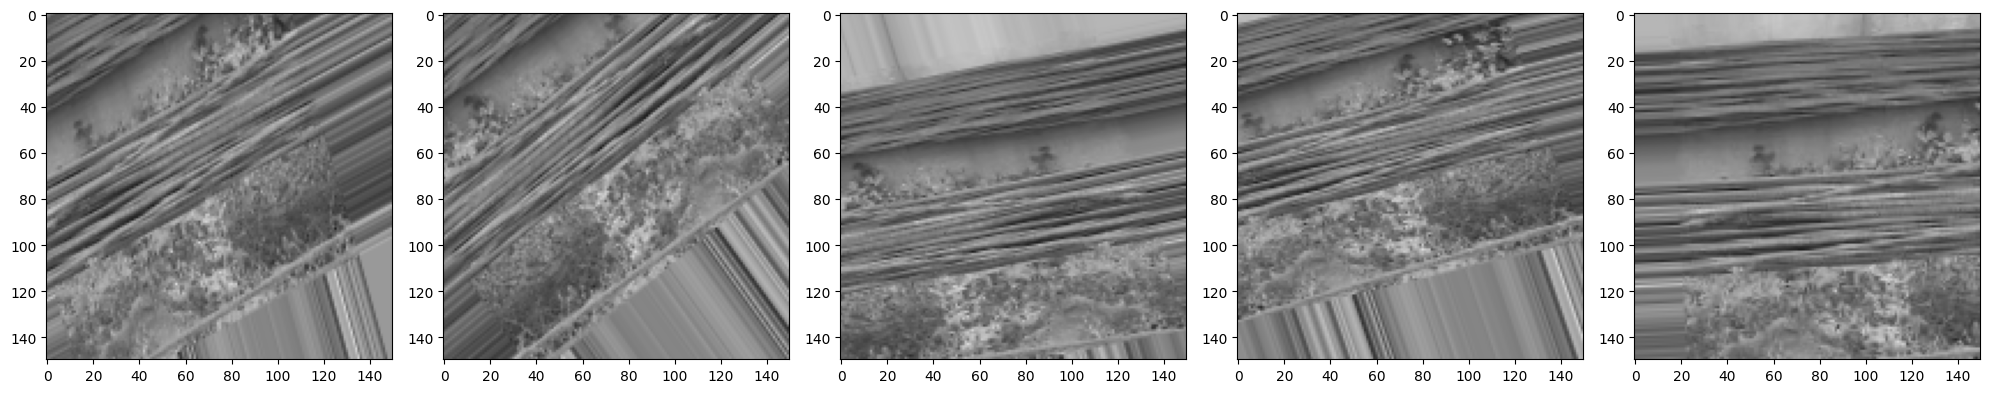

In [ ]:
# visualizing the augmented images
# i.e. how the same image is looking in 10 different ways

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# creating validation data generator
# image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir,subset='validation',
                                                 target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')

Found 65 images belonging to 2 classes.


In [ ]:
# creating the model

# neural network architecture
model = tf.keras.Sequential()

# convolutional neural network
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# artificial neural network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compiling the model
opt = 'adam'
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# reviewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
# training the model

epochs = 100
history = model.fit_generator(
    train_data_gen,
    # steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs = epochs,
    validation_data = val_data_gen,
    # validation_steps = int(np.ceil(total_validation/float(BATCH_SIZE)))
)

<ipython-input-32-18c2e54fd9f3>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
9/9 [==============================] - 4s 420ms/step - loss: 0.4137 - accuracy: 0.8390 - val_loss: 0.6624 - val_accuracy: 0.6923
Epoch 2/100
9/9 [==============================] - 4s 470ms/step - loss: 0.4035 - accuracy: 0.8015 - val_loss: 0.7718 - val_accuracy: 0.6462
Epoch 3/100
9/9 [==============================] - 2s 274ms/step - loss: 0.4285 - accuracy: 0.8015 - val_loss: 0.7409 - val_accuracy: 0.5077
Epoch 4/100
9/9 [==============================] - 2s 269ms/step - loss: 0.4708 - accuracy: 0.8090 - val_loss: 0.7215 - val_accuracy: 0.5692
Epoch 5/100
9/9 [==============================] - 2s 272ms/step - loss: 0.4445 - accuracy: 0.7978 - val_loss: 0.7440 - val_accuracy: 0.6769
Epoch 6/100
9/9 [==============================] - 3s 277ms/step - loss: 0.3936 - accuracy: 0.8277 - val_loss: 0.6964 - val_accuracy: 0.7538
Epoch 7/100
9/9 [==============================] - 4s 405ms/step - loss: 0.3956 - accuracy: 0.8202 - val_loss: 0.7292 - val_accuracy: 0.5385
Epoch 8/100
9

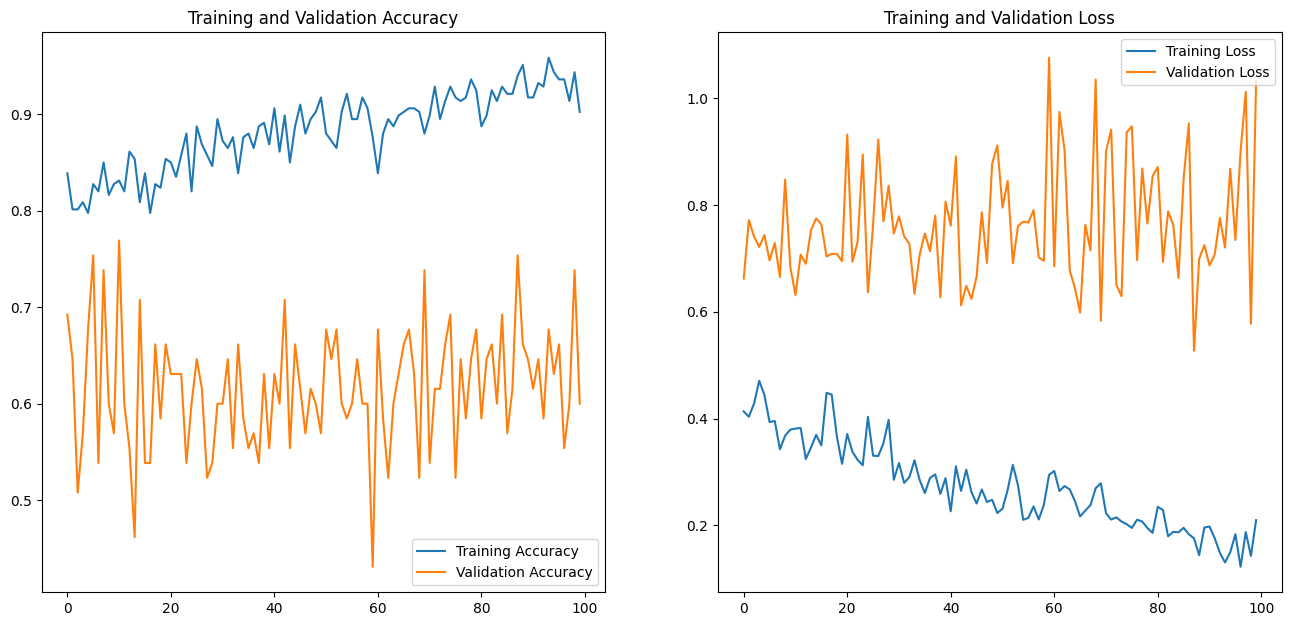

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plotting accuracy
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plotting loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# evaluating the model

_, acc = model.evaluate(val_data_gen, steps=len(val_data_gen), verbose=0)
print("Accuracy of the model:",'%.3f' % (acc * 100.0),'%')

Accuracy of the model: 66.154 %


In [ ]:
# saving the model
model.save('classifier.hdf5') 

In [ ]:
# load and prepare the image
def load_image(filename):
	img = tf.keras.utils.load_img(filename, target_size=(IMG_SHAPE, IMG_SHAPE))
	img_array = tf.keras.utils.img_to_array(img)
	img_array = tf.expand_dims(img_array, 0) # Create a batch
	return img_array

In [ ]:
# defining labels
labels = ['debris', 'rebars']

In [ ]:
# printing the file names
def showfn(filename_arr):
  for f in filename_arr:
    print(f)

In [ ]:
from matplotlib.image import imread

def showImg(filename_arr):
  plt.figure(figsize= (20,10))
    
  for i in range(5):
    plt.subplot(1,5,i+1)
    img = imread(filename_arr[i])
    plt.imshow(img)

  plt.show()

1/1 [==============================] - 0s 28ms/step
/content/drive/MyDrive/ML_project_course/dataset/cementitiousDebris/37.png
/content/drive/MyDrive/ML_project_course/dataset/rebars/7.png
/content/drive/MyDrive/ML_project_course/dataset/cementitiousDebris/12.png
/content/drive/MyDrive/ML_project_course/dataset/cementitiousDebris/89.png
/content/drive/MyDrive/ML_project_course/dataset/rebars/2.png


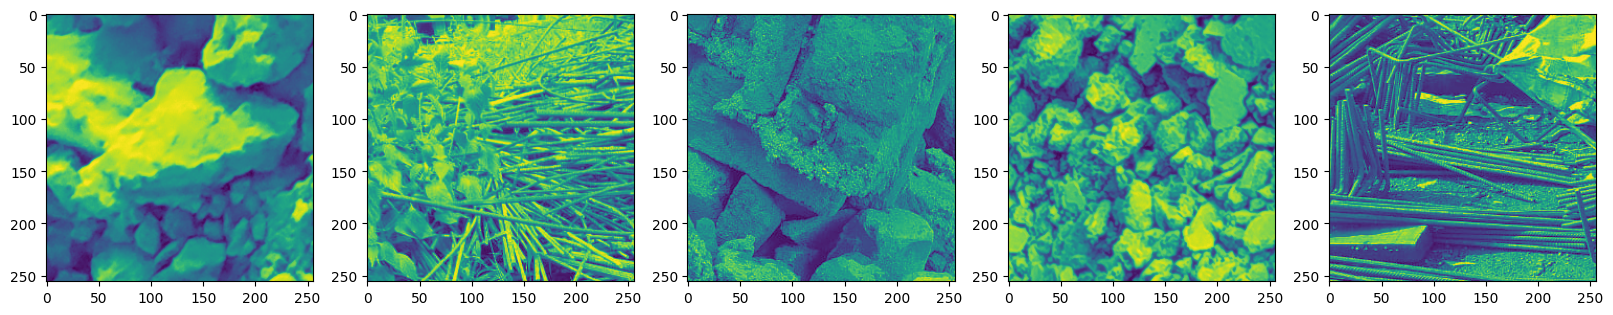

['debris', 'rebars', 'debris', 'debris', 'rebars']


In [ ]:
filename_arr = []
test_predictions = []

for i in np.random.randint(1,100, size=5):
  ran = np.random.randint(2)

  # getting the image file name
  if ran == 0:
    filename = train_dir + '/'+'rebars'+'/' + str(i) + '.png'
  else:
    filename = train_dir +'/'+'cementitiousDebris'+ '/' +str(i) + '.png'

  filename_arr.append(filename)

  # predict the class
  img = load_image(filename)
  result = model.predict(img)

  if (result[0][0] > 0.5):
    index = 1
  else:
    index = 0
  
  test_predictions.append(labels[index])

showfn(filename_arr)
showImg(filename_arr)
print(test_predictions)

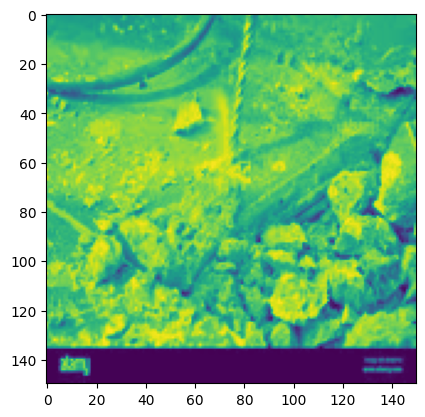

In [ ]:
# testing a random image, even out of the validation sample images
# sample_url1 = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.dreamstime.com%2Fblack-white-imahe-construction-worker-many-deformed-steel-bar-working-hydraulic-rebar-cutting-machine-site-image174433081&psig=AOvVaw1TVc11fFzdlyPYdmIuYVA_&ust=1680546506846000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCJDJ997pi_4CFQAAAAAdAAAAABAE"
# path = tf.keras.utils.get_file('sample_1',origin=sample_url1)
import cv2
pth = "rev.png"
img = cv2.imread(pth,0)
width = 150
height = 150
dim = (width, height)

# Resize the image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img)
plt.show()
# importing modules
# import urllib.request
# from PIL import Image

# urllib.request.urlretrieve(
# 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.dreamstime.com%2Fblack-white-imahe-construction-worker-many-deformed-steel-bar-working-hydraulic-rebar-cutting-machine-site-image174433081&psig=AOvVaw1TVc11fFzdlyPYdmIuYVA_&ust=1680546506846000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCJDJ997pi_4CFQAAAAAdAAAAABAE',
# "gfg.png")

# img = Image.open("gfg.png")
# img.show()


In [ ]:
# img = tf.keras.utils.load_img(path, target_size=(IMG_SHAPE, IMG_SHAPE))
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
from tensorflow import keras
img_path = pth
img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# predicting the result
result = model.predict(img_array)

if (result[0][0] > 0.5):
    index = 1
else:
    index = 0

print("This image most likely belongs to {}".format(labels[index]))

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to debris
